In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clt
import seaborn as sns
import pandas as pd

In [3]:
#%% WYKRES ZBIEŻNOŚCI 
cars = sns.load_dataset("car_crashes")
mean = cars.total.mean()
std = cars.total.std()
cars['zscore'] = (cars.total-mean)/std
srt = cars.sort_values('zscore',ascending=True)
#%%
xticks = [srt.total.min(),mean-std,mean,mean+std,srt.total.max()]
lws = [0.5,1,2,1,0.5] # grubości linii



Text(0, 0.5, 'State')

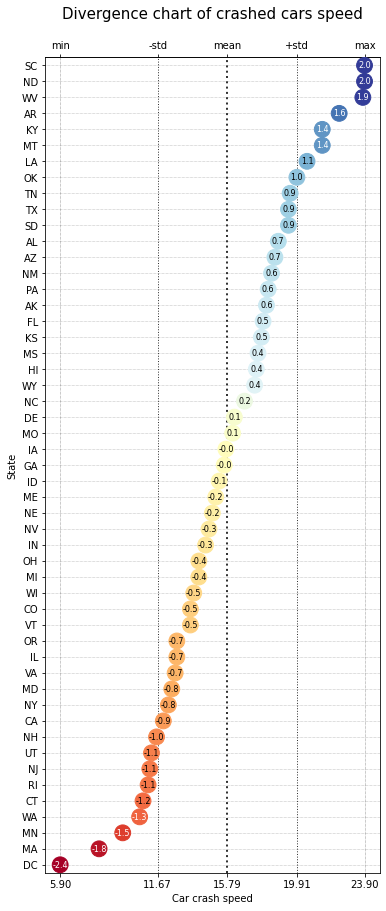

In [4]:
fig, ax = plt.subplots(figsize=(6,15))
ax.scatter(srt.total,srt.abbrev,s=250,zorder=10,c=srt.total,cmap='RdYlBu',norm=clt.TwoSlopeNorm(vcenter=mean,vmin=mean-2*std,vmax=mean+2*std))
for x,y,z in zip(srt.total,srt.abbrev,srt.zscore):
    c = 'k' if -1.25 < z < 1.25 else 'w' # 1 odchylenie standardowe
    ax.text(x,y,"{:.1f}".format(z),ha='center',va='center',zorder=20,fontsize=8,color=c)

ax.set_ylim(-0.5,+srt.shape[0]-0.5)

ax.set_xticks(xticks)
secax = ax.secondary_xaxis('top')
secax.set_ticks(xticks,labels=["min","-std","mean","+std","max"])
ax.grid(axis='y',color='0.5', linestyle=':', linewidth=0.5)
for lw,tick in zip(lws,xticks):
    ax.axvline(tick,ls=":",lw=lw,color='0.2')

ax.set_title("Divergence chart of crashed cars speed",y=1.04,size=15)
ax.set_xlabel("Car crash speed")
ax.set_ylabel("State")